# The xskillscore package to evaluate forecasts

In [5]:
import xskillscore as xs
import numpy as np
import simulations
import matplotlib.pyplot as plt
import xarray as xr

/Users/Marieke_Wesselkamp/PycharmProjects/Ricker/models.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Marieke_Wesselkamp/PycharmProjects/Ricker/models.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(1, 260) (1, 260)


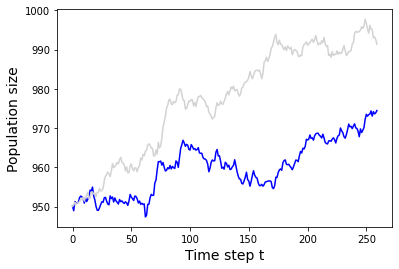

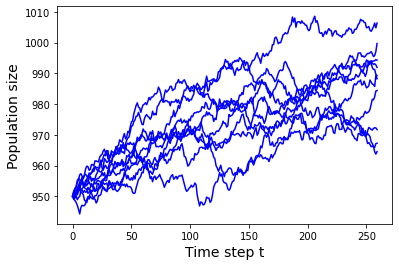

In [23]:
# Verification data
sims = simulations.Simulator()
sims.hyper_parameters(simulated_years=5,
                           ensemble_size=1,
                           initial_size=(950, 950))
sims.simulation_parameters(regime="non-chaotic", behaviour="stochastic")
sims.environment('non-exogeneous', trend=False)
sims.model_type("multi-species")
x_true = sims.simulate()
x_obs = x_true[:,:,0]

# Forecast
sims = simulations.Simulator()
sims.hyper_parameters(simulated_years=5,
                           ensemble_size=10,
                           initial_size=950)
sims.simulation_parameters(regime="non-chaotic", behaviour="stochastic")
sims.environment('non-exogeneous', trend=False)
sims.model_type("single-species")
x_mod = sims.simulate()

print(x_mod[0,:].reshape(1,x_mod.shape[1]).shape, x_obs.shape)

## Deterministic metrics

In [44]:
a = xr.DataArray(x_obs, dims=['x', 'time'])
b = xr.DataArray(x_mod[0,:].reshape(1,x_mod.shape[1]), dims=['x', 'time'])
c = xr.DataArray(x_mod, dims=['x', 'time'])
print(a.shape, b.shape, c.shape)
print(a)

(1, 260) (1, 260) (10, 260)
<xarray.DataArray (x: 1, time: 260)>
array([[950.1295243 , 948.96332459, 951.26296329, 950.95216414,
        950.84270384, 951.18635078, 952.30300349, 952.68666925,
        952.48359498, 952.10875706, 950.88427066, 952.24864948,
        951.29759327, 951.87008847, 952.72224246, 954.20100043,
        953.98028884, 954.97302579, 952.7264685 , 951.67832038,
        950.02818134, 949.07934657, 949.05261003, 949.731506  ,
        950.58934824, 951.23994344, 951.10788733, 952.26535757,
        952.36023792, 951.40479355, 950.64297533, 950.4702885 ,
        952.73056559, 952.04352547, 952.45297871, 951.17632257,
        952.21509064, 951.44467982, 951.12266964, 950.67056843,
        951.81217736, 951.26268809, 951.45259355, 951.07769589,
        950.78919837, 951.21860197, 950.97925146, 950.30653198,
        951.34753424, 953.11108843, 952.42176134, 952.04784688,
        951.55961546, 952.69355963, 952.57695239, 951.96258423,
        950.93682621, 951.40936924, 950

In [47]:
print(xs.mae(a, b, dim='time'))
print(xs.r2(a, b, dim='time'))

<xarray.DataArray (x: 1)>
array([28.43378134])
Dimensions without coordinates: x
<xarray.DataArray (x: 1)>
array([-19.09123114])
Dimensions without coordinates: x


In [51]:
observations = xr.DataArray(x_obs, dims=['x', 'time'])
forecasts = xr.DataArray(x_mod[0,:].reshape(1,x_mod.shape[1]), dims=['member', 'time'])
xs.rank_histogram(observations, forecasts, 'x')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)